In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data_df = pd.read_csv("diamonds.csv")
data_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [42]:
print(data_df.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


So we don't have missing data but it seems here that the first column is only index so let's drop it

In [43]:
data_df = data_df.drop(["Unnamed: 0"], axis=1)
data_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


It seems strange to have some x, y, and z minimum values at 0. Indeed, if some of these values are null, it means that we have two-dimensional diamonds or even less. For logical reasons, we are going to remove data with such values.

In [44]:
#let's drop those 0 values point
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From this sort we have remove 20 points.

In [45]:
diamonds_above_5_carat = data_df[data_df["carat"] > 4]
diamonds_above_5_carat.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


Verification of diamond prices and dataset consistency: The maximum price appears relatively low, but we notice that the larger diamonds all seem to have relatively low prices. However, they are observed to have colors between I, J, and H, which are considered lower-quality colors. This makes the data consistent. (Validation with the RAPAPORT).


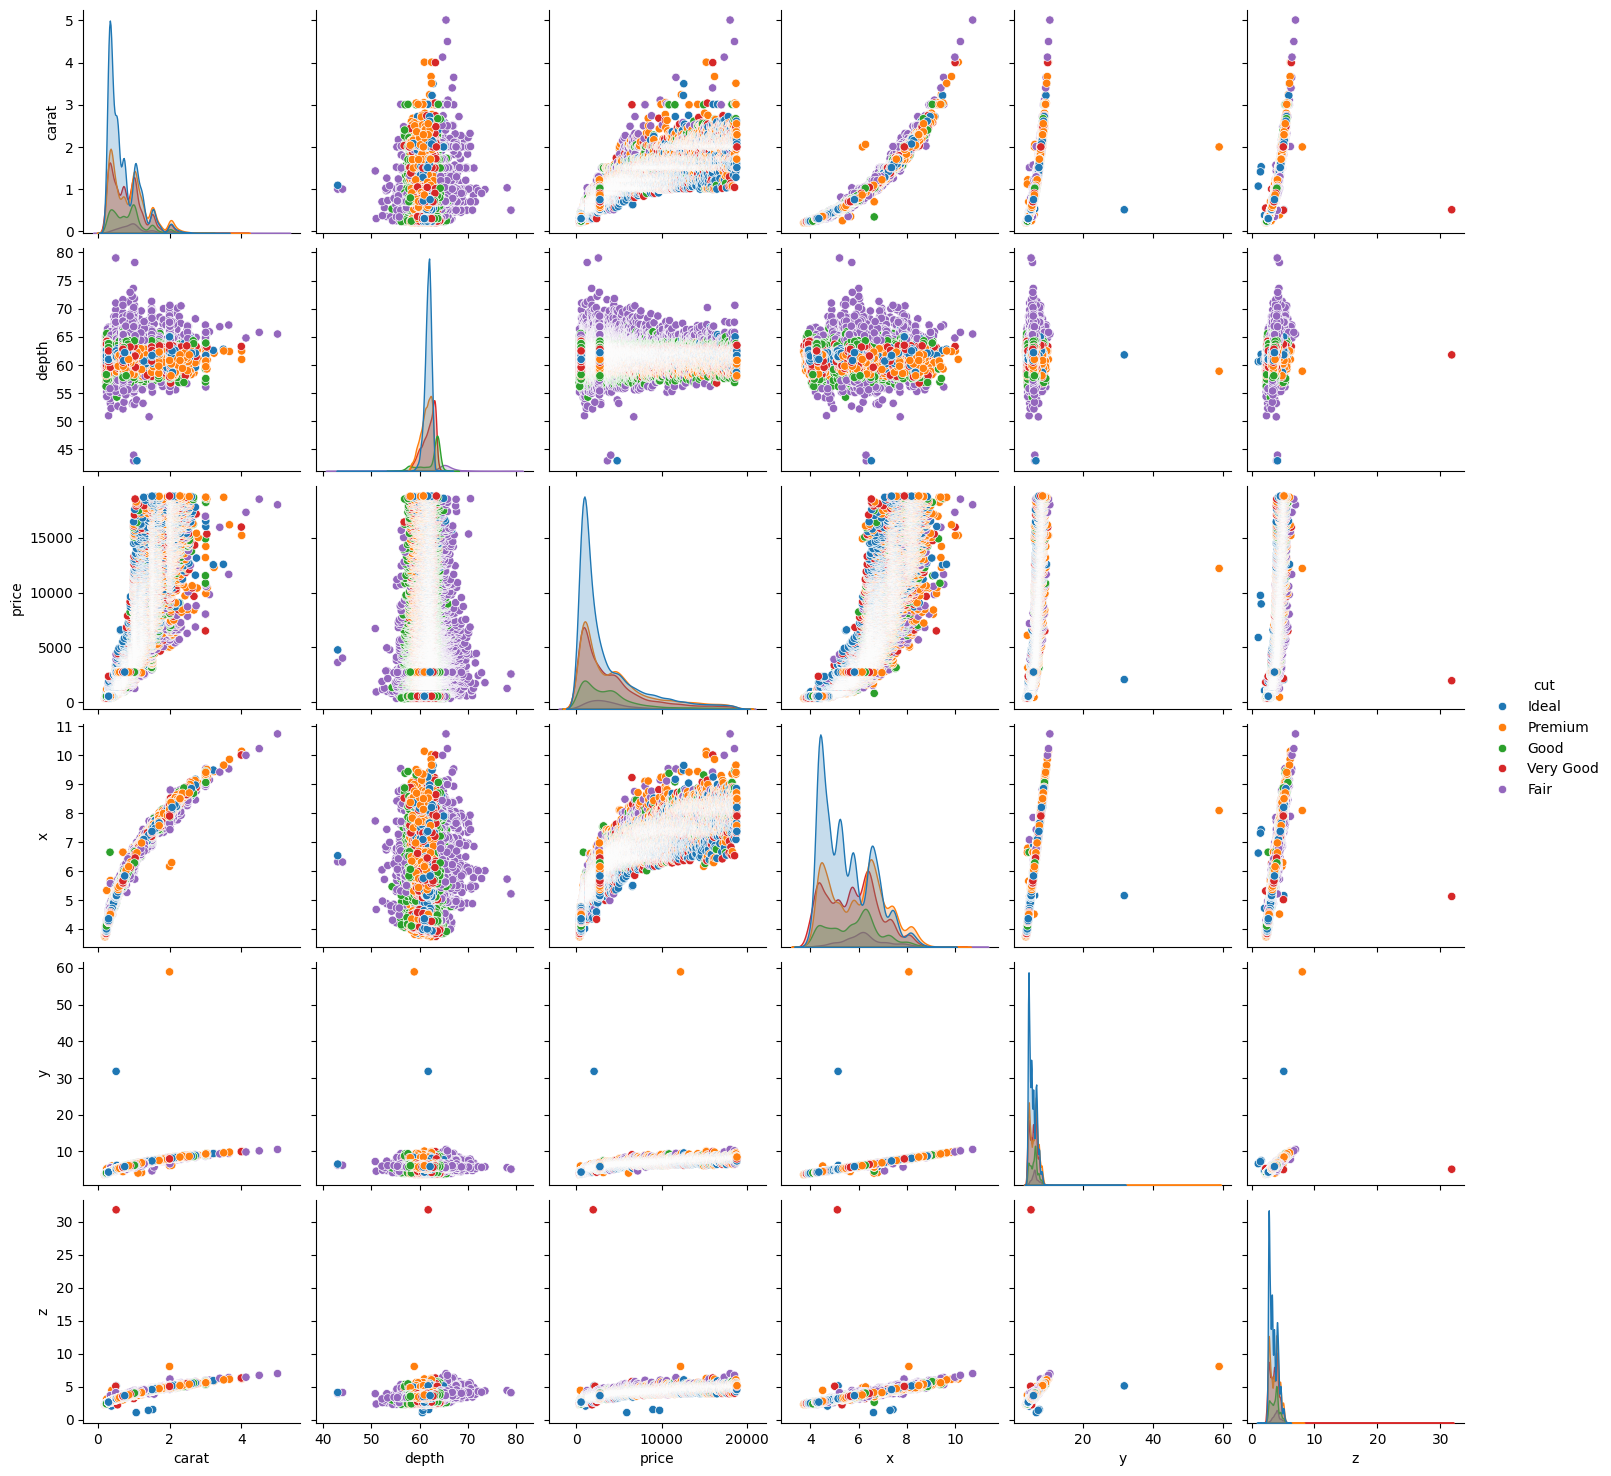

In [46]:
columns_to_plot = ["carat", "depth", "price", "x", "y", "z", "cut"]
pairplot_data = data_df[columns_to_plot]
sns.pairplot(pairplot_data, hue="cut", diag_kind="kde", height=2.5)
plt.show()



Here are a few observations from the pair plots:

Some features contain data points that are significantly different from the rest of the dataset, which could impact the results of our regression model.

- The variables "y" and "z" have dimensional outliers in the dataset that need to be removed.

- The "depth" variable should likely be capped, but we need to inspect the regression line to confirm this.

- The "table" variable also appears to have outliers, so it should be capped as well.

Let's examine the regression plots to take a closer look at these outliers.

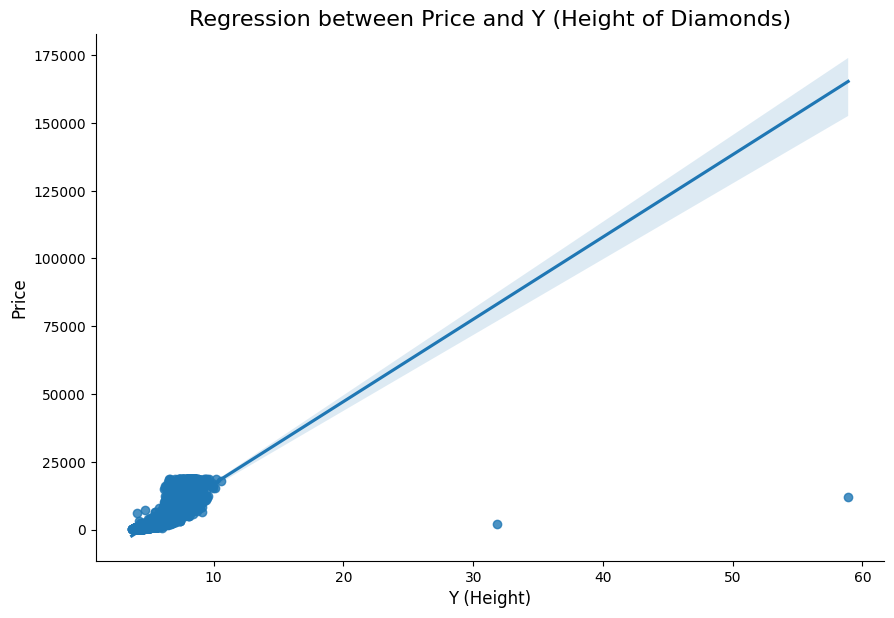

In [47]:
sns.lmplot(data=data_df, x="y", y="price", height=6, aspect=1.5)
plt.title("Regression between Price and Y (Height of Diamonds)", fontsize=16)
plt.xlabel("Y (Height)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()


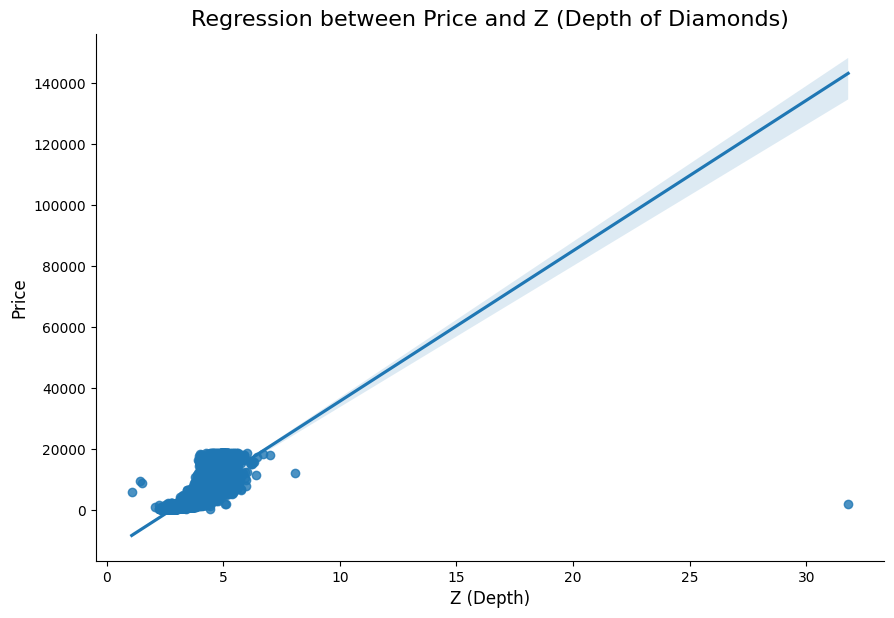

In [48]:
sns.lmplot(data=data_df, x="z", y="price", height=6, aspect=1.5)
plt.title("Regression between Price and Z (Depth of Diamonds)", fontsize=16)
plt.xlabel("Z (Depth)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

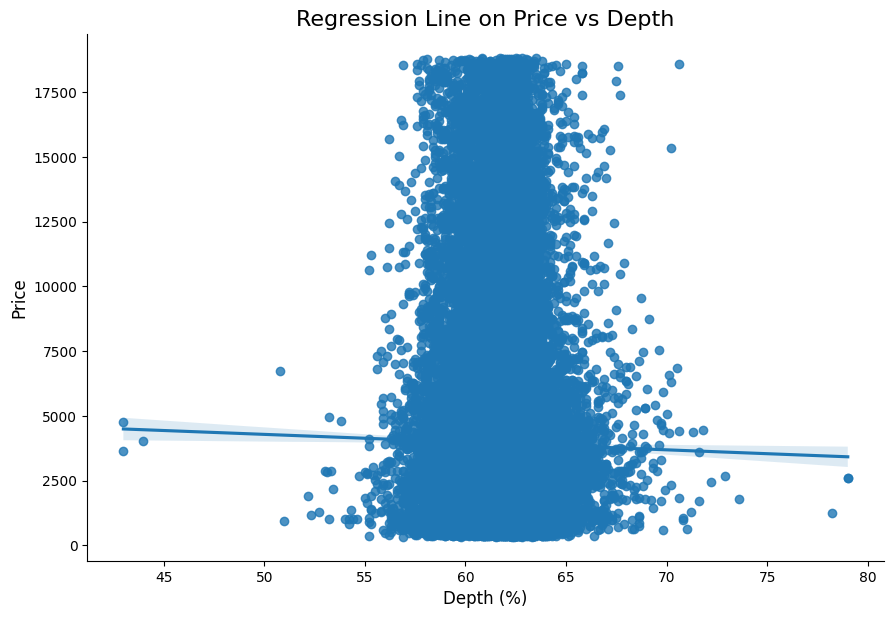

In [49]:
sns.lmplot(data=data_df, x="depth", y="price", height=6, aspect=1.5)
plt.title("Regression Line on Price vs Depth", fontsize=16)
plt.xlabel("Depth (%)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

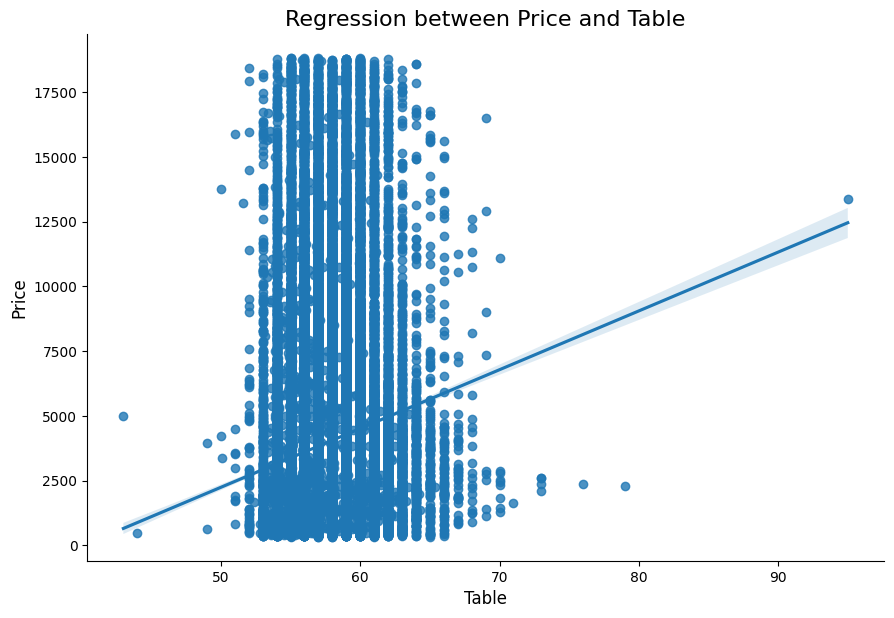

In [50]:
sns.lmplot(data=data_df, x="table", y="price", height=6, aspect=1.5)
plt.title("Regression between Price and Table", fontsize=16)
plt.xlabel("Table", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

In [51]:
data_df = data_df[(data_df["depth"] < 75) & (data_df["depth"] > 45)]
data_df = data_df[(data_df["table"] < 80) & (data_df["table"] > 40)]
data_df = data_df[(data_df["x"] < 30)]
data_df = data_df[(data_df["y"] < 30)]
data_df = data_df[(data_df["z"] < 30) & (data_df["z"] > 2)]
data_df.shape

(53907, 10)

So we have removed the data points that could have distorted  our models.


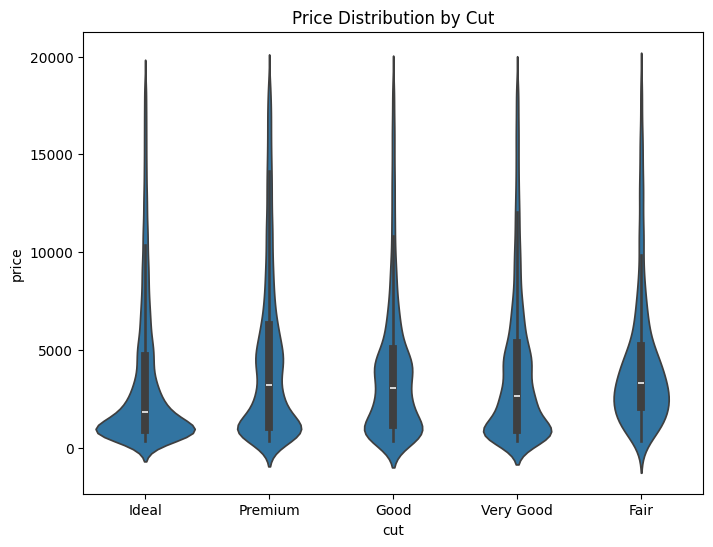

In [52]:
plt.figure(figsize=(8, 6))

sns.violinplot(x='cut', y='price', data=data_df)
plt.title('Price Distribution by Cut')
plt.show()

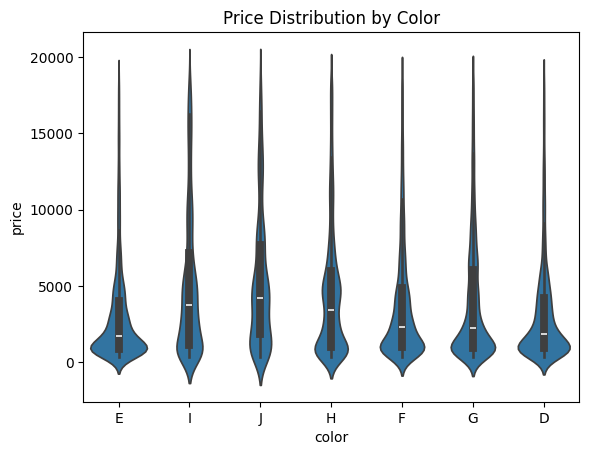

In [53]:
sns.violinplot(x='color', y='price', data=data_df)
plt.title('Price Distribution by Color')
plt.show()

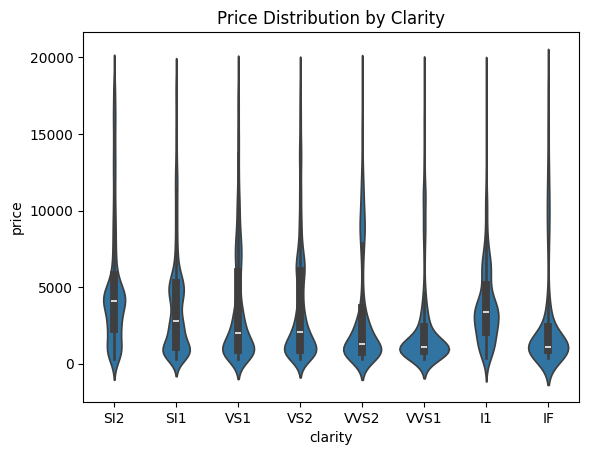

In [54]:
sns.violinplot(x='clarity', y='price', data=data_df)
plt.title('Price Distribution by Clarity')
plt.show()

In [55]:
data_df_copy = data_df.copy()


In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_df_copy['cut'] = label_encoder.fit_transform(data_df_copy['cut'])
data_df_copy['color'] = label_encoder.fit_transform(data_df_copy['color'])
data_df_copy['clarity'] = label_encoder.fit_transform(data_df_copy['clarity'])
data_df_copy.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

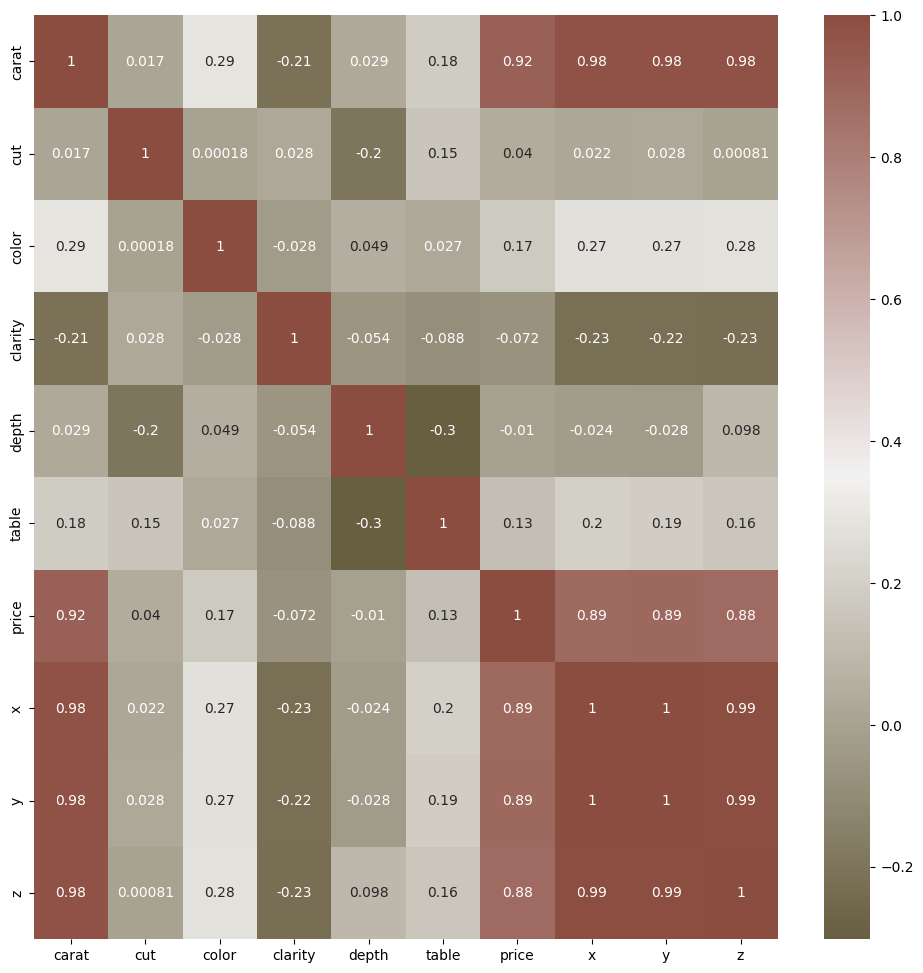

In [57]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= data_df_copy.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

We see the price seems corlated to carat, x, y and z

In general, we would expect a stronger relationship between the price and the color, or the price and the clarity of the diamonds. However, in this dataset, we only have diamonds of lower quality in terms of both color and clarity. As a result, there isn't a significant correlation, which suggests that our regression model may not be applicable to diamonds of higher quality.

In [58]:
from sklearn.model_selection import train_test_split

X = data_df_copy.drop(["price"], axis=1)
y = data_df_copy["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [60]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

R²: 0.8890
MAE: 849.3507
MSE: 1741183.6678
